In [16]:
# xmlrpc_client.ipynb

import xmlrpc.client
import pickle
import pandas as pd
import datetime as dt

# server = xmlrpc.client.ServerProxy("http://localhost:8008")
server_proxy = xmlrpc.client.ServerProxy("http://localhost:8801")

# print('Ping:', server.ping())

# print('Server datetime:', server.now())

# print('View, type, value:', server.type(2))
# print('View, type, value:', server.type(2.))
# print('View, type, value:', server.type('My string'))
# print('View, type, value:', server.type("My string"))
# print('View, type, value:', server.type([1,2,3]))
# print('View, type, value:', server.type(["one", "two", "three"]))
# print('View, type, value:', server.type((1,2,"3")))

# print('Sum 2 + 3 :', server.sum(2, 3))
# print('Pow 2^3: ', server.pow(2, 3))

print('Ping:', server_proxy.send_to_server("ping"))

print('Server datetime:', server_proxy.send_to_server("now"))

print('Server datetime:', server_proxy.send_to_server("type", 2))
print('Server datetime:', server_proxy.send_to_server("type", 2.))
print('Server datetime:', server_proxy.send_to_server("type", 'My string'))
print('Server datetime:', server_proxy.send_to_server("type", "My string"))
print('Server datetime:', server_proxy.send_to_server("type", [1,2,3]))
print('Server datetime:', server_proxy.send_to_server("type", ["one", "two", "three"]))
print('Server datetime:', server_proxy.send_to_server("type", (1,2,"3")))

print('Server datetime:', server_proxy.send_to_server("sum", 2, 3))
print('Server datetime:', server_proxy.send_to_server("pow", 2, 3))

Ping: True
Server datetime: 20231023T13:38:44
Server datetime: ['2', "<class 'int'>", 2]
Server datetime: ['2.0', "<class 'float'>", 2.0]
Server datetime: ['My string', "<class 'str'>", 'My string']
Server datetime: ['My string', "<class 'str'>", 'My string']
Server datetime: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
Server datetime: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
Server datetime: ["[1, 2, '3']", "<class 'list'>", [1, 2, '3']]
Server datetime: 5
Server datetime: 8


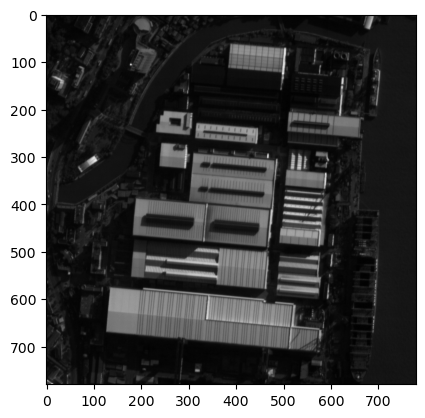

In [17]:
#отображение монохромного изображения
from PIL import Image # Работа с изображением
from pylab import * # Отображение

import xmlrpc

# Режим отображения внутри ноутбука
%matplotlib inline

img_mono = Image.open('11.bmp')

img_arr_mono = array(img_mono)
gray()
# Исходное изображение
imshow(img_arr_mono)

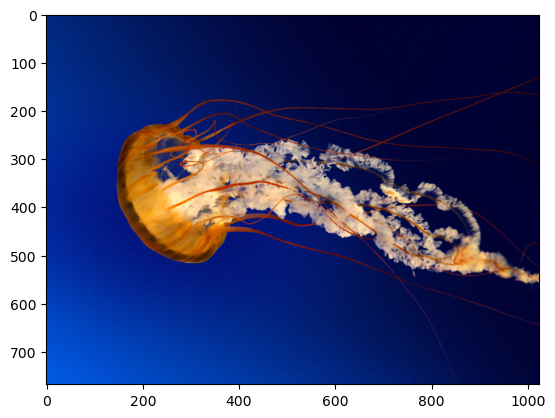

In [18]:
#отображение цветного изображения
from PIL import Image # Работа с изображением
from pylab import * # Отображение

import xmlrpc

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('Jellyfish.jpg')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

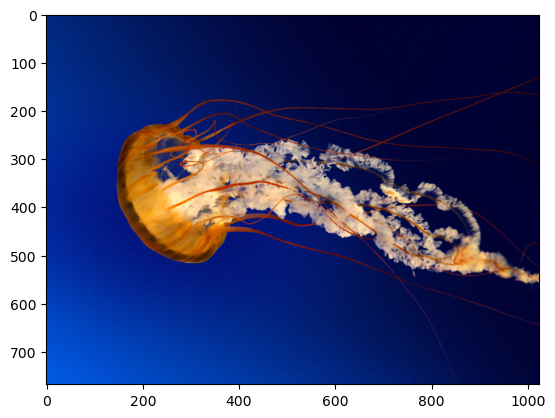

In [19]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpc.client.Binary(pimg)

img_bin2 = server_proxy.send_to_server("send_back_binary", img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

In [20]:
#Пункт 4
print(server_proxy.send_to_server("black_list_check", 'Петров', 'Петр', 'Петрович', '07.08.1985'))
print(server_proxy.send_to_server("black_list_check", 'Петрова', 'Петр', 'Петрович', '07.08.1985'))
print(server_proxy.send_to_server("black_list_check", 'Петров', 'Иван', 'Петрович', '07.08.1985'))
print(server_proxy.send_to_server("black_list_check", 'Петров', 'Петр', 'Иванович', '07.08.1985'))
print(server_proxy.send_to_server("black_list_check", 'Петров', 'Петр', 'Петрович', '07.06.1985'))

# print(server.black_list_check('Петров', 'Петр', 'Петрович', '07.08.1985'))
# print(server.black_list_check('Петрова', 'Петр', 'Петрович', '07.08.1985'))
# print(server.black_list_check('Петров', 'Иван', 'Петрович', '07.08.1985'))
# print(server.black_list_check('Петров', 'Петр', 'Иванович', '07.08.1985'))
# print(server.black_list_check('Петров', 'Петр', 'Петрович', '07.06.1985'))

Петров Петр Петрович 07.08.1985: bad_boy
Петрова Петр Петрович 07.08.1985: good_boy
Петров Иван Петрович 07.08.1985: good_boy
Петров Петр Иванович 07.08.1985: good_boy
Петров Петр Петрович 07.06.1985: good_boy


In [21]:
# Инверсия цвета изображения через сервер функция
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
     
    img_bin2 = server_proxy.send_to_server("send_back_inversion", img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

# Поворот изображения через сервер функция
def rotate_image(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server_proxy.send_to_server("rotate", img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

# Бинаризация изображения через сервер функция
def binarization_image(img_arr_in, n):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server_proxy.send_to_server("binarization_image", img_bin, n)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

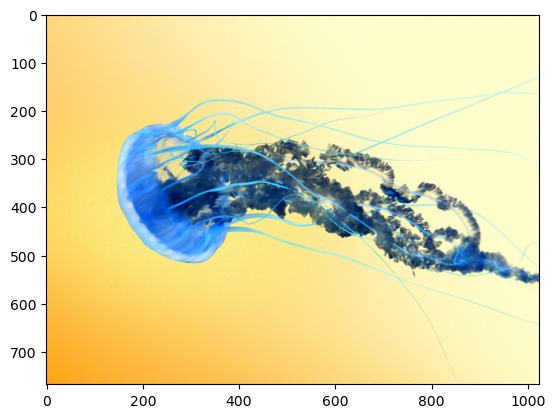

In [22]:
# Инверсия цвета изображения через сервер цветное изображение
img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

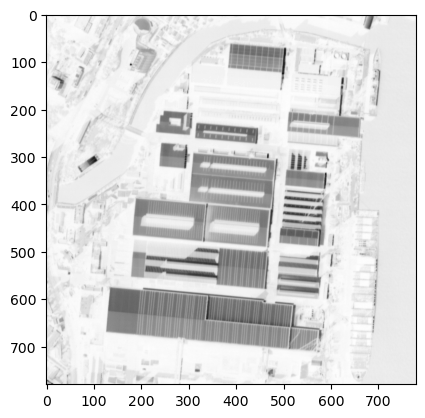

In [23]:
# Инверсия цвета изображения через сервер монохромное изображение

img_arr_inv = inv_color(img_arr_mono)

# Изображение с инверсией цвета
imshow(img_arr_inv)

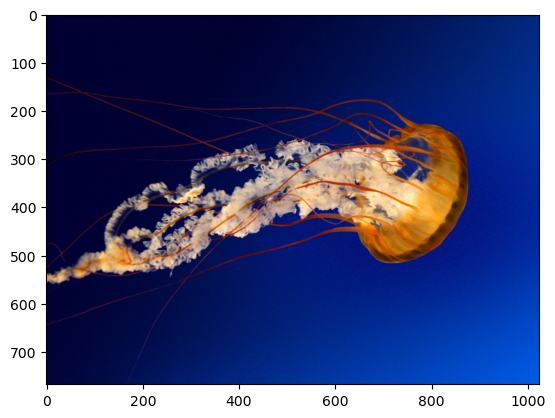

In [24]:
# Поворот цветного изображения через сервер
img_arr_inv = rotate_image(img_arr)

# Отраженоое изображение
imshow(img_arr_inv)

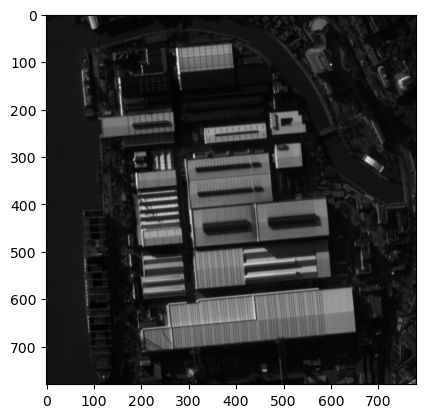

In [25]:
# Поворот монохромного изображения через сервер
img_arr_inv = rotate_image(img_arr_mono)

# Отраженоое изображение
imshow(img_arr_inv)

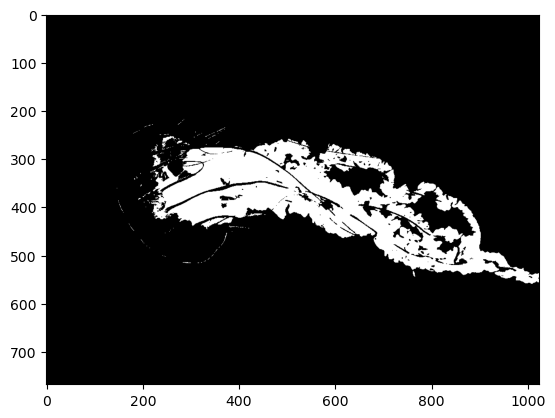

In [26]:
# Бинаризация цветного изображения через сервер

img_arr_inv = binarization_image(img_arr, 56)

# Изображение с бинаризацией
imshow(img_arr_inv)

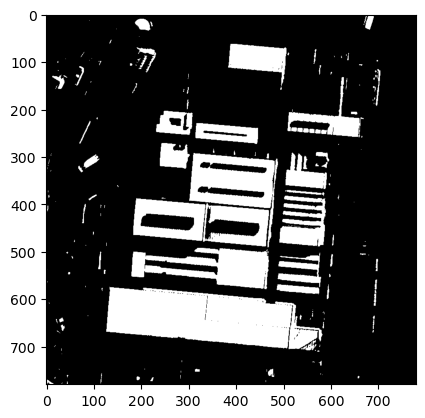

In [27]:
# Бинаризация монохромного изображения через сервер

img_arr_inv = binarization_image(img_arr_mono, 56)

# Изображение с бинаризацией
imshow(img_arr_inv)

In [30]:
op = "type"
dl = "2023-9-15 21:07:00"
dr = "2023-9-15 21:09:00"

img_bin2 = server_proxy.send_to_server("return_logs", op, dl, dr)
print(img_bin2)

[['type', '2023-09-15 21:07:40'], ['type', '2023-09-15 21:07:44'], ['type', '2023-09-15 21:07:49'], ['type', '2023-09-15 21:07:53'], ['type', '2023-09-15 21:07:57'], ['type', '2023-09-15 21:08:01'], ['type', '2023-09-15 21:08:05']]


In [34]:
name = "type"
time_l = 3.5
time_r = 4.1
dt = "2023-10-23 13:"

res = server_proxy.send_to_server("return_log_db", name, time_l, time_r, dt)
print(res)

[['type', 4.060973167419434, '2023-10-23 13:18:56'], ['type', 4.0826475620269775, '2023-10-23 13:19:12'], ['type', 4.062235355377197, '2023-10-23 13:19:20'], ['type', 4.090539932250977, '2023-10-23 13:19:29'], ['type', 4.058211088180542, '2023-10-23 13:19:37'], ['type', 4.066928148269653, '2023-10-23 13:19:45'], ['type', 4.082521438598633, '2023-10-23 13:38:54'], ['type', 4.099406719207764, '2023-10-23 13:39:02'], ['type', 4.059413433074951, '2023-10-23 13:39:11'], ['type', 4.069361209869385, '2023-10-23 13:39:19'], ['type', 4.067065477371216, '2023-10-23 13:39:27'], ['type', 4.083946466445923, '2023-10-23 13:39:35'], ['type', 4.0942909717559814, '2023-10-23 13:39:43']]
